# Set up environment

Requires Tensorflow==1.15

In [1]:
import os
import numpy as np
import PIL.Image as Image
import sqlite3

import tensorflow as tf
import tensorflow.keras.utils as utils

from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import label_map_util
import requests
import sqlite3

In [2]:
tf.__version__

'1.15.0'

## Declare parameters

In [5]:
ROOT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))

IMAGE_SIZE = 512

API_KEY = "4INghUtThsIBWPTIcvfKyf0kNS6MtSXcC4R6mpNB"
BASE_URL = "https://api.nal.usda.gov/fdc/v1/"

# Input model

In [6]:
MODEL_PATH = os.path.join(ROOT_DIR, "models", "food_detection", "tensorflow", "ssd_mobilenet_v2", "frozen_inference_graph.pb")

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(MODEL_PATH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

## Define inference pipeline

In [7]:
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
num_detections = detection_graph.get_tensor_by_name('num_detections:0')


## Fetch label map

In [8]:
LABELS_PATH = os.path.join(os.path.abspath(os.sep), "Datasets", "food256", "Tensorflow", "label_map.pbtxt")

label_map = label_map_util.load_labelmap(LABELS_PATH)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=256, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Predict on image

## Load image from url

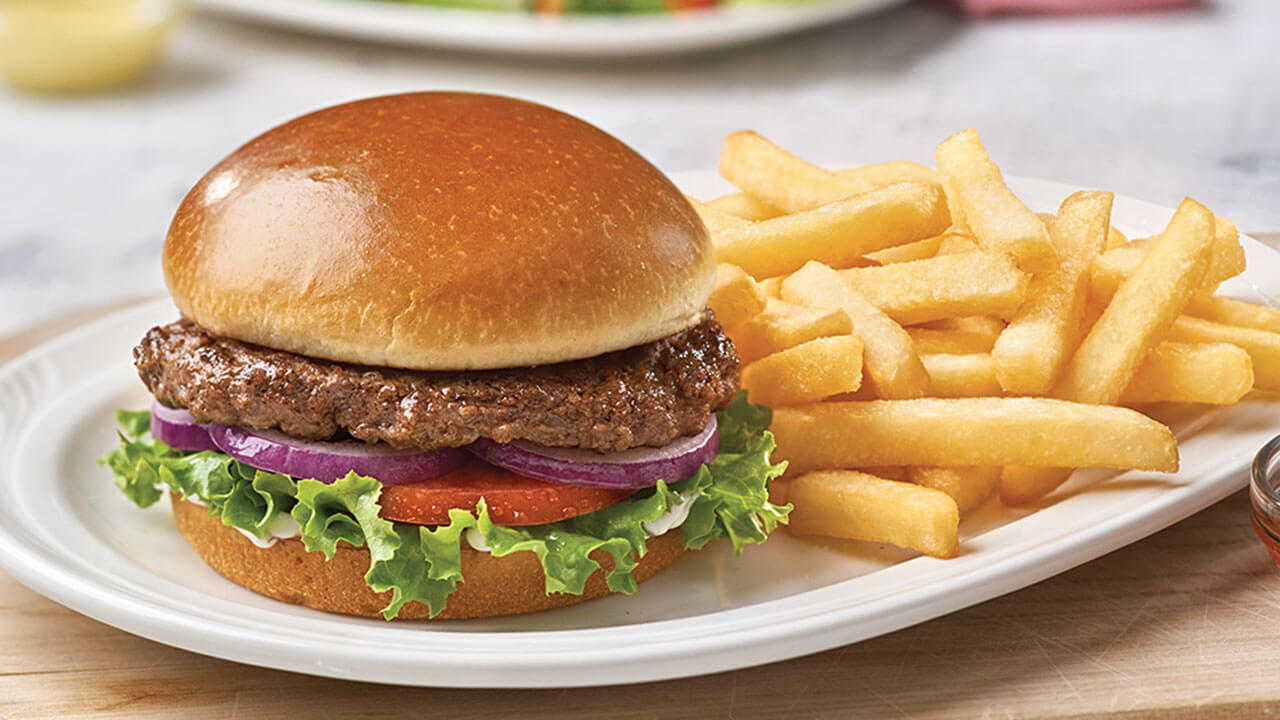

In [9]:
url = "https://d9hyo6bif16lx.cloudfront.net/live/img/production/detail/menu/lunch-dinner_999-combohs_all-american-burger-fries.jpg"

def loadImage(url):
    filename = url.split('/')[-1]
    img = utils.get_file(filename, url)
    img = Image.open(img)
    return img

img = loadImage(url)
img

## Run inference on image

In [11]:
# convert image to numpy and batch
img = np.asarray(img)
x = np.expand_dims(img, axis=0)
    
boxes, scores, labels, num = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: x})

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node FeatureExtractor/MobilenetV2/Conv/Conv2D (defined at c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
	 [[Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_45/_191]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node FeatureExtractor/MobilenetV2/Conv/Conv2D (defined at c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'FeatureExtractor/MobilenetV2/Conv/Conv2D':
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-5b46b254be0d>", line 9, in <module>
    tf.import_graph_def(od_graph_def, name='')
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\importer.py", line 405, in import_graph_def
    producer_op_list=producer_op_list)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\importer.py", line 517, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3561, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3561, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3451, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "c:\programdata\miniconda3\envs\tensorflow1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


## Extract results from model output

In [5]:
CONFIDENCE_THRESHOLD = 0.5

def extractResults(boxes, labels, scores):
    boxes = []
    labels = []
    
    i = 0
    for score in scores:
        if(score < confidence):
            break
        
        # extract bounding box
        boxes.append(boxes[i])
        
        # extract label
        labels.append(labels[i])
                       
    return boxes, labels

boxes, labels = extractResults(boxes, labels, scores)
boxes

NameError: name 'boxes' is not defined

## Draw predicted bounding boxes on image

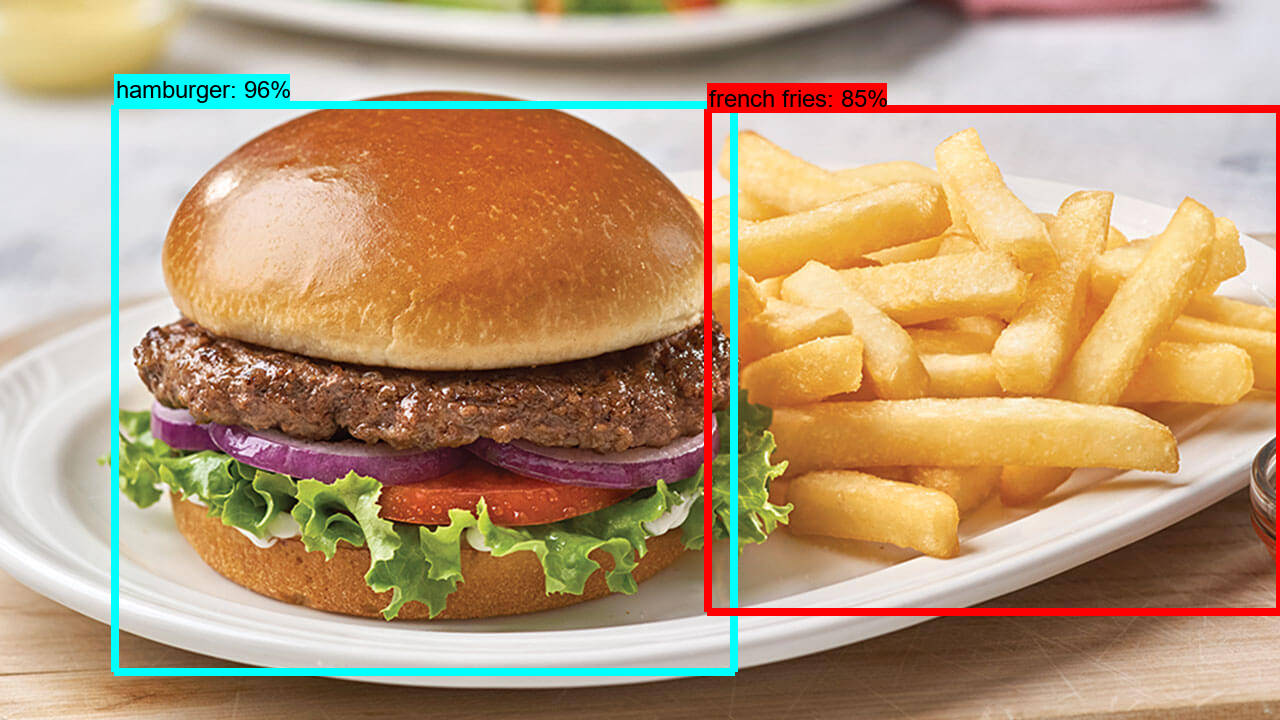

In [8]:
CONFIDENCE_THRESHOLD = 0.5

def showResults(img, outputs):
    # convert img to numpy array
    img_np = np.array(img)
    
    boxes, scores, classes, num = outputs
    
    vis_util.visualize_boxes_and_labels_on_image_array(
        img_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=CONFIDENCE_THRESHOLD)
    
    return Image.fromarray(img_np, 'RGB')

showResults(img, outputs)

# Predict food weights

## Estimate plate width

As largest distance between any two points on bounding boxes.

In [25]:
PLATE_DIAMETER = 25 # cm

# Extract bounding boxes
boxes = []
i = 0
for score in outputs[1][0]:
    if score >= CONFIDENCE_THRESHOLD:
        boxes.append(outputs[0][0][i])
        i += 1
    else:
        break
        
def distance(x, y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
    
# extract largest distance between two corners
i = 0
diameter = 0
for A in boxes:
    for B in boxes[i:]:
        # top left to bottom right
        x = distance(A[:2], B[2:])
        if x > diameter:
            diameter = x
        
        # bottom left to top right
        x = distance(A[2:], B[:2])
        if x > diameter:
            diameter = x
    i += 1

# estimate size of image in cm
img_size_cm = PLATE_DIAMETER / diameter
img_size_cm

21.737407304700277

# Nutritional lookup

## Import nutritional database

In [55]:
DATABASE_PATH = os.path.join(ROOT_DIR, "nutrition", "food.db")

connection = sqlite3.connect(DATABASE_PATH)
c = connection.cursor()

## Estimate weight and nutrition for each food

In [59]:
total_energy = 0
total_weight = 0

i = 0
for box in boxes:
    lbl = str(int(outputs[2][0][i]))
    c.execute('SELECT * FROM food WHERE id = ?', (lbl,))
    lbl, class_name, energy, protein, fats, carbs, sugars, density, depth = c.fetchone()
    
    # calculate surface area (asuming oval shape)
    surface_area = (box[2]-box[0])/2 * (box[3]-box[1])/2 * np.pi * img_size_cm**2
    
    # estimate volume (using average depth)
    volume = surface_area * depth
    
    # estimate weight (using food density)
    weight = volume * density
    
    total_energy += energy * weight / 100
    total_weight += weight
    
    i += 1
    
print("Estimated weight {0} g".format(total_weight))
print("Estimated energy {0} kcal".format(total_energy))

Estimated weight 660.9804121137918 g
Estimated energy 1172.013064738641 kcal
